#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 26s 60ms/step - loss: 0.7140 - accuracy: 0.7631 - val_loss: 0.4993 - val_accuracy: 0.8332
Epoch 2/10
430/430 [==============================] - 25s 59ms/step - loss: 0.4676 - accuracy: 0.8380 - val_loss: 0.4417 - val_accuracy: 0.8548
Epoch 3/10
430/430 [==============================] - 25s 59ms/step - loss: 0.4199 - accuracy: 0.8545 - val_loss: 0.4104 - val_accuracy: 0.8622
Epoch 4/10
430/430 [==============================] - 25s 59ms/step - loss: 0.3923 - accuracy: 0.8638 - val_loss: 0.3929 - val_accuracy: 0.8702
Epoch 5/10
430/430 [==============================] - 25s 59ms/step - loss: 0.3733 - accuracy: 0.8700 - val_loss: 0.3710 - val_accuracy: 0.8748
Epoch 6/10
430/430 [==============================] - 25s 59ms/step - loss: 0.3596 - accuracy: 0.8742 - val_loss: 0.3639 - val_accuracy: 0.8802
Epoch 7/10
430/430 [==============================] - 25s 59ms/step - loss: 0.3478 - accuracy: 0.8794 - val_loss: 0.3566 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.epoch,history.history['loss'])
    plt.plot(history.epoch,history.history['val_loss'])
    plt.title('loss')

def plot_accuracy(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.epoch,history.history['accuracy'])
    plt.plot(history.epoch,history.history['val_accuracy'])
    plt.title('accuracy')

def pl(histroy):
    plot_loss(history)

    plot_accuracy(history)

    scores = model.evaluate(X_test, y_test, verbose=2)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

###Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

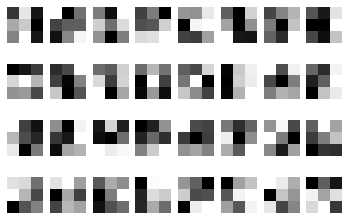

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1568500   
_________________________________________________________________
dense_2 (Dense)              (None, 200)              

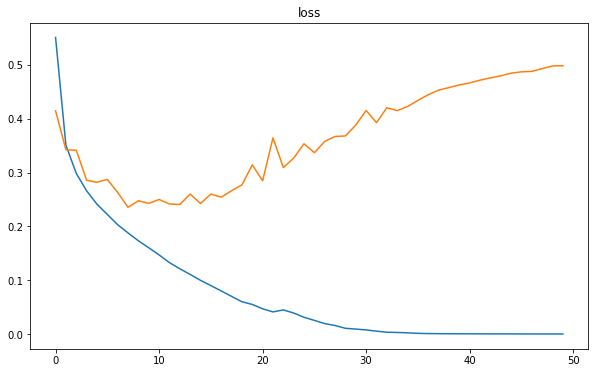

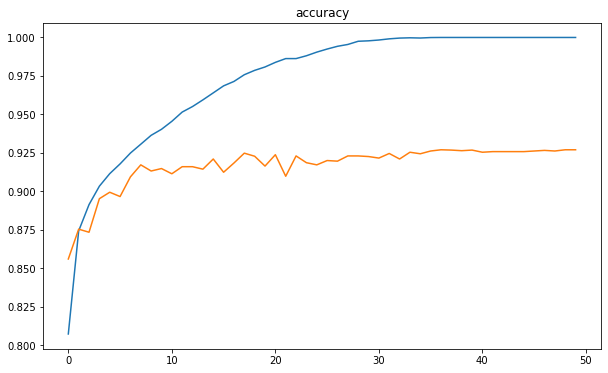

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[5,5], padding="same", activation="relu", input_shape=[28, 28,1]), 
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same", activation="relu"), 
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(200, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_valid, y_valid))
pl(history)

### Test results discussion
The best model that I found is the one in previous cell.

The achieved accuracy on the test set is 92,25%

Besides, I also tested other models: 
* I tried to create a more complex CNN, but the more complex the net, the worse the performances on the test set.
* Adding more layers(both convolutional and fully connected) just overfitted the training set and decreased the general performances. I tried also to mix convolutional and dense layers but this just led to worse performances.
* The RELU activation function seems to be the better. I tried to change it but it led to worse general performances.
* I tried also to increase the number of filters and size of pooling, but this just led to increase training time without increase performances.
* The number of epochs i choose creates overfitting on training set but achieves the best performances on test set.
* Adding regularization just avoids overfitting but doesn't increase accuracy.
* I tried many batch sizes and 16 gave the best results. Set it to small values led to instability and to big values cannot capture features well.
* Changing optimizer didn't performe better so i kept the first.


Discussion:
I tried many combinations of networks. I wanted to try to make a really complicateed network to see if performances increases but it would have taken too much time. The one I used took about 100 minutes. The accuracy i reached on test set isn't so great, I think it could be higher.